<h1 style='text-align: center;'> FIFA </h1>

In [1]:
import swifter
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

Utilizar Matplotlib y Plotly para realizar las graficas:

**1. Con los datos de Fifa, organizar a los jugadores de acuerdo al peso en las siguientes escalas y generar un cuadro tipo PIE.**

* Debajo 125 Lbs.
* 125-150
* 150-175
* 175 o superior



In [2]:
# Carga y limpieza de datos nullos.
data_fifa = pd.read_csv ('./datasets/fifa_datos.csv')
data_fifa = data_fifa.dropna(subset=['Weight'])
data_fifa = data_fifa.reset_index(drop=True)
data_fifa.tail(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18154,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18155,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18156,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18157,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18158,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [3]:
data_fifa['Weight'] = data_fifa['Weight'].swifter.apply(lambda x: int(str(x).replace('lbs', '')))

weight_below_125 = data_fifa[(data_fifa['Weight'] < 125)].shape[0]
weight_between_125_150 = data_fifa[(data_fifa['Weight'] >= 125) & (data_fifa['Weight'] < 150)].shape[0]
weight_between_150_175 = data_fifa[(data_fifa['Weight'] >= 150) & (data_fifa['Weight'] < 175)].shape[0]
weight_greater_175 = data_fifa[(data_fifa['Weight'] >= 175)].shape[0]

weights_dict = {
    'Inferior a 125 lbs': weight_below_125,
    'Entre 125 y 150 lbs': weight_between_125_150,
    'Entre 150 y 175 lbs': weight_between_150_175,
    'Mayor a 175 lbs': weight_greater_175
}

Pandas Apply:   0%|          | 0/18159 [00:00<?, ?it/s]

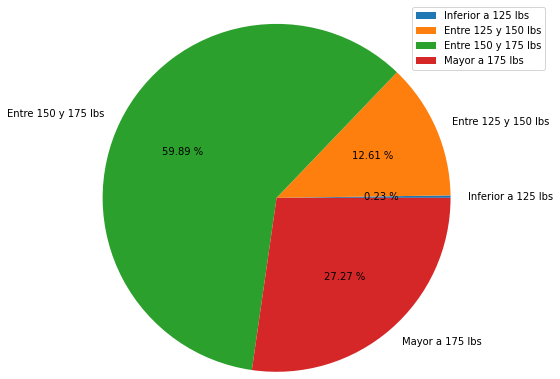

In [4]:
# Matplotlib
plt.pie(weights_dict.values(), labels=weights_dict.keys(),  autopct='%.2f %%', radius=2)
plt.legend(bbox_to_anchor=(1.1,1.4), loc="upper left")
plt.show()

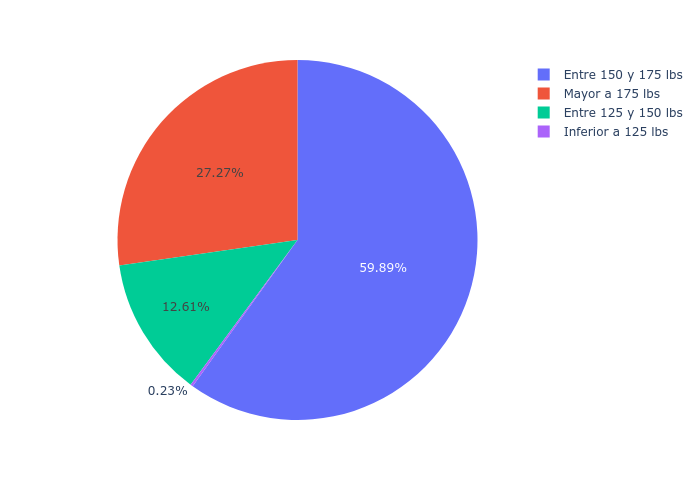

In [5]:
# Plotly
fig = px.pie(values=weights_dict.values(), names=weights_dict.keys())
fig.update_traces(texttemplate='%{percent:.2%}')
fig.show('png')

**2. Generar un grafico de barras (histograma) de acuerdo a su habilidad (Overall)  en base a los siguientes segmentos contando el número de jugadores**

* 40
* 50
* 60
* 70
* 80
* 90


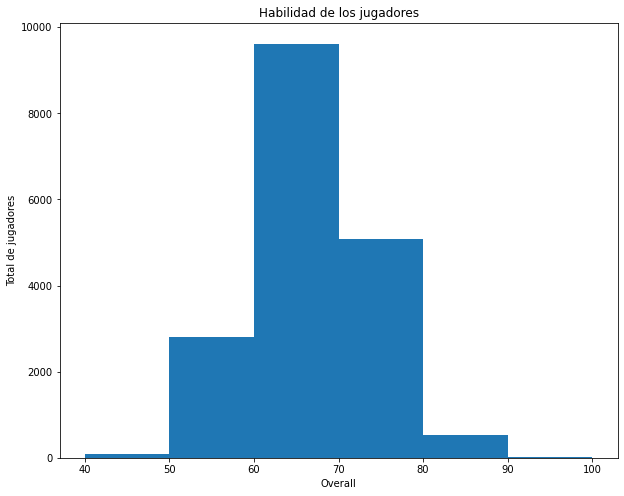

In [6]:
# Matplotlib
data_fifa = data_fifa.dropna(subset=['Overall'])
data_fifa = data_fifa.reset_index(drop=True)
plt.figure(figsize=(10,8)) 
plt.hist(data_fifa['Overall'], bins = [40,50,60,70,80,90,100])
plt.title('Habilidad de los jugadores')
plt.ylabel('Total de jugadores')
plt.xlabel('Overall')
plt.show()

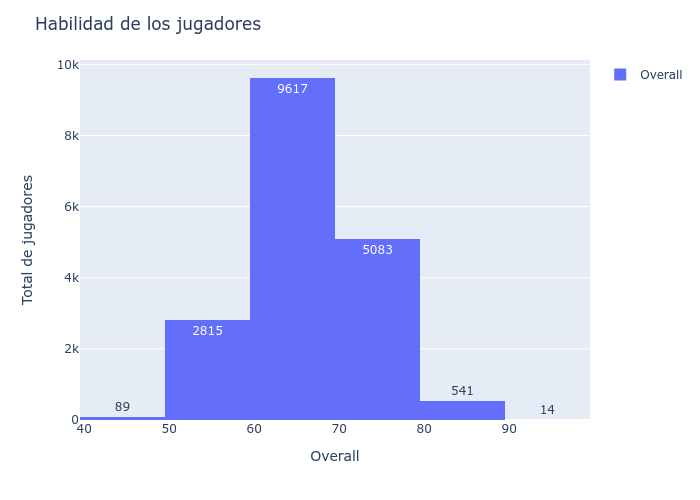

In [7]:
# Plotly
df = px.data.tips()
fig = px.histogram(data_fifa['Overall'], nbins=6, text_auto=True)
fig.update_layout(
    title="Habilidad de los jugadores",
    xaxis_title="Overall",
    yaxis_title="Total de jugadores",
    legend_title=""
)
fig.show('png')

**3. Investigar alguna herramienta o software que permita generar reportes con Python utilizando CodeLabs.**

### ReportLab
ReportLab es el motor de código abierto, ultra robusto y de gran duración para crear documentos PDF complejos y basados en datos y gráficos vectoriales personalizados.

In [ ]:
#Ejemplo
#Importamos los modulos necesarios
from reportlab.pdfgen import canvas
from reportlab.lib.units import mm
doc = canvas.Canvas("Fifa_reporte_ReportLab.pdf")
#Escribimos una cadena de Texto dentro del documento
doc.drawString(100, 750, "REPORTES FIFA.")
#Inseratmos la imagen en el documento
doc.drawImage("./imgs/newplot.png",100,200,width=15*cm,
                     height=15*cm)
#Guardamos el documento
doc.save()